<a href="https://colab.research.google.com/github/vijay1674/datamining/blob/main/Exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install squarify

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

shape of the dataset: (7501, 20)
First few rows of the dataset:
              0          1           2   ...               17       18         19
0         shrimp    almonds     avocado  ...  frozen smoothie  spinach  olive oil
1        burgers  meatballs        eggs  ...              NaN      NaN        NaN
2        chutney        NaN         NaN  ...              NaN      NaN        NaN
3         turkey    avocado         NaN  ...              NaN      NaN        NaN
4  mineral water       milk  energy bar  ...              NaN      NaN        NaN

[5 rows x 20 columns]


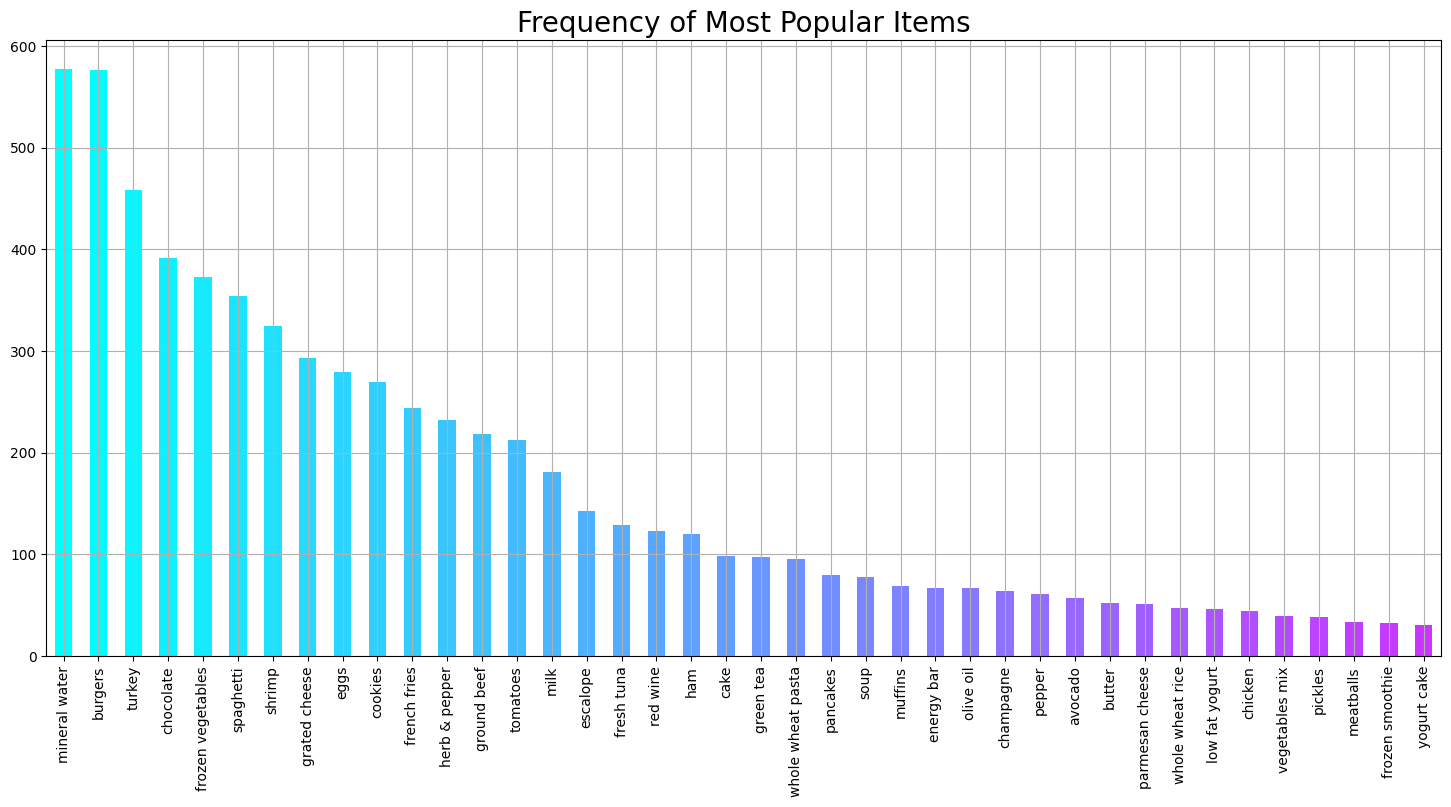

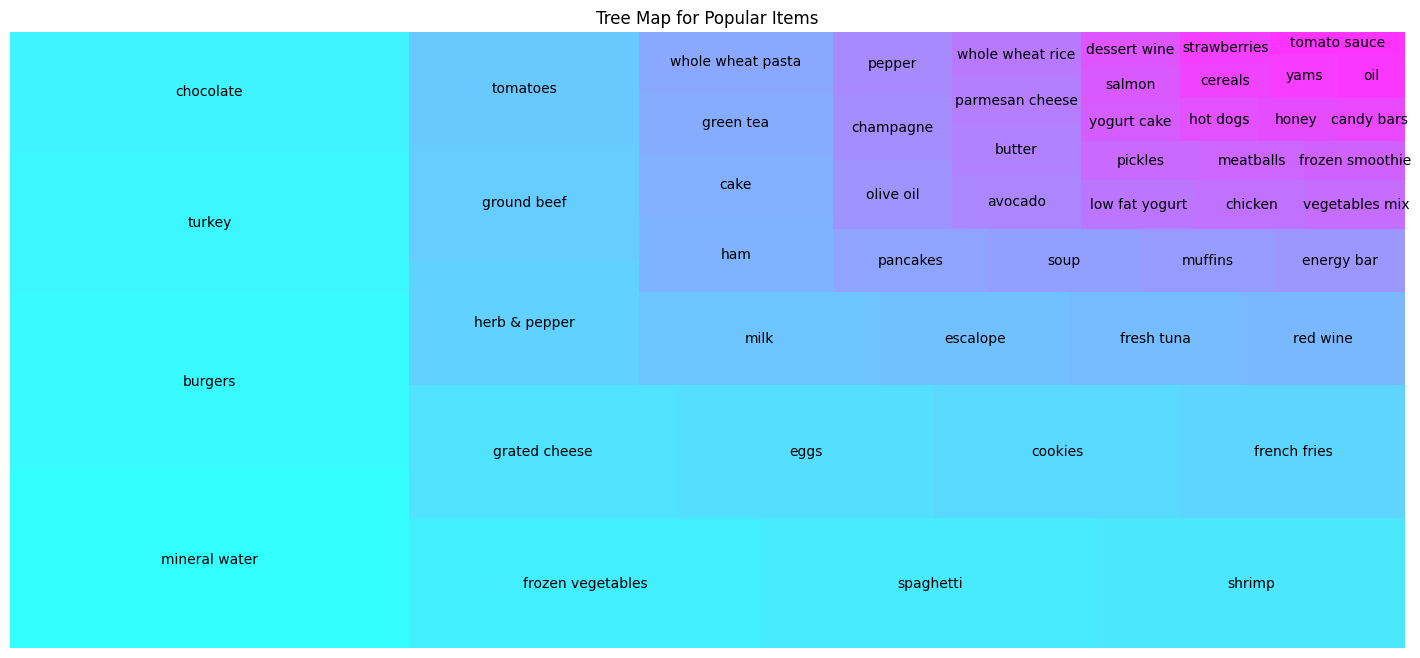

In [49]:
data=pd.read_csv('/content/store_data.csv',header=None)
print("shape of the dataset:",data.shape)
print("First few rows of the dataset:")
print(data.head())
data[0].value_counts().head(40).plot.bar(color=color)
plt.title("Frequency of Most Popular Items", fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()
y = data[0].value_counts().head(50).to_frame()
y.index
plt.rcParams['figure.figsize'] = (18, 8)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


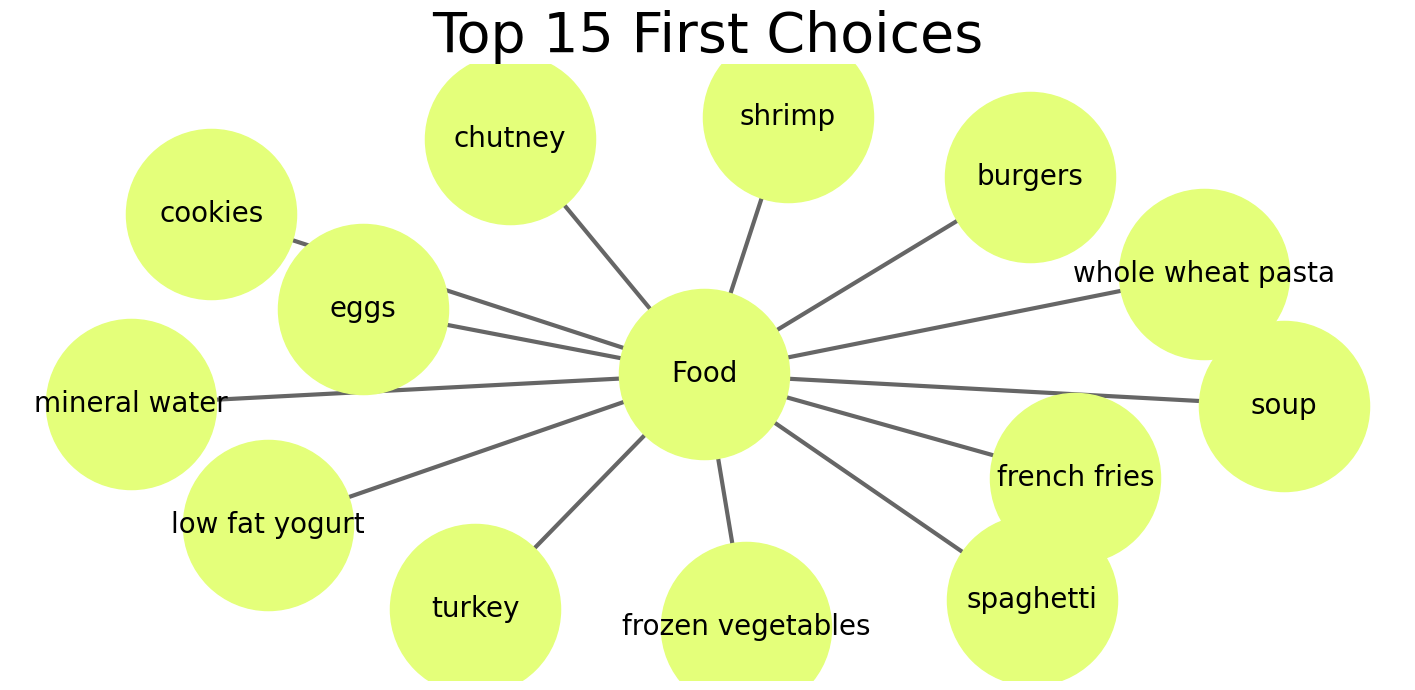

Frequent Itemsets with at least 5% support:
      support                               itemsets
0    1.000000                                 (Food)
1    0.087188                              (burgers)
2    0.081056                                 (cake)
3    0.059992                              (chicken)
4    0.163845                            (chocolate)
..        ...                                    ...
110  0.050927             (nan, eggs, mineral water)
111  0.059725        (spaghetti, nan, mineral water)
112  0.052660  (Food, nan, chocolate, mineral water)
113  0.050927       (Food, nan, eggs, mineral water)
114  0.059725  (Food, spaghetti, nan, mineral water)

[115 rows x 2 columns]


In [40]:
data['food'] = 'Food'
food = data.truncate(before=-1, after=15)
import networkx as nx
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize=40)
plt.show()

transactions = []
for i in range(len(data)):
  transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)

